# The Adapter (Wrapper)  - Structural Pattern

### Problem

Imagine you have a legacy component in your software that provides critical functionality. This component has an interface incompatible with the rest of your system, making it challenging to integrate smoothly. 

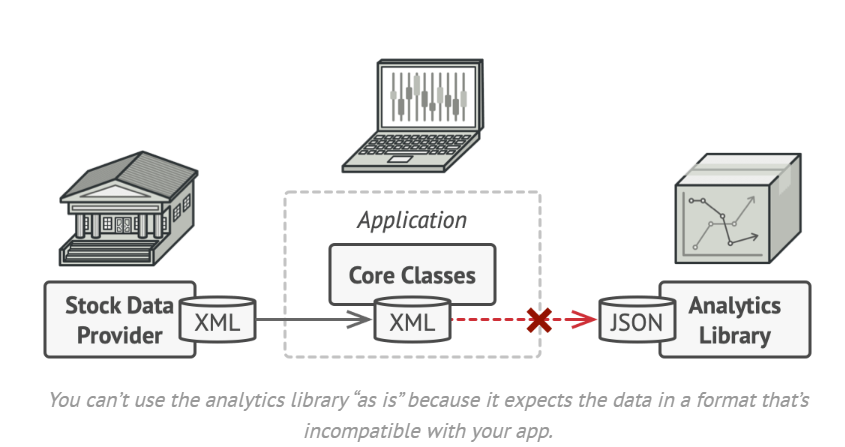

### Solution

You can create an Adapter. ​

This is a special object that converts the interface of one object so that another object can understand it.​

**Key Components**

* `Target Interface`: The target interface defines the contract that the client code expects. It is the interface the adapter will conform to, allowing the client to interact with the adaptee seamlessly.

* `Adaptee`: The adaptee is the class or component with an incompatible interface. It’s the object you want to make use of but cannot interact with directly from the client. Usually a 3rd party or legacy service.

* `Adapter`: The intermediary that bridges the gap between the target interface and the adaptee. It translates calls from the client in a way that the adaptee can understand and respond to.

### Class Adapter VS Object Adapter

1. In the first form, a "**class adapter**" utilizes inheritance. ​

The class adapter extends the adaptee class and adds the desired methods to the adapter. These methods can be declared in an interface (ie, the "target" interface).​

​

2. In the second form, an "**object adapter**" utilizes composition. ​

The object adapter contains an adaptee and implements the target interface to interact with the adaptee.

####  Class Adapter

It relies on inheritance, inheriting *interfaces from both objects at once*. However, it’s only an option in programming languages that support *multiple inheritance*, like C++ & Python.

It’s very often used in systems based on some legacy code. In such cases, Adapters make legacy code work with modern classes.​

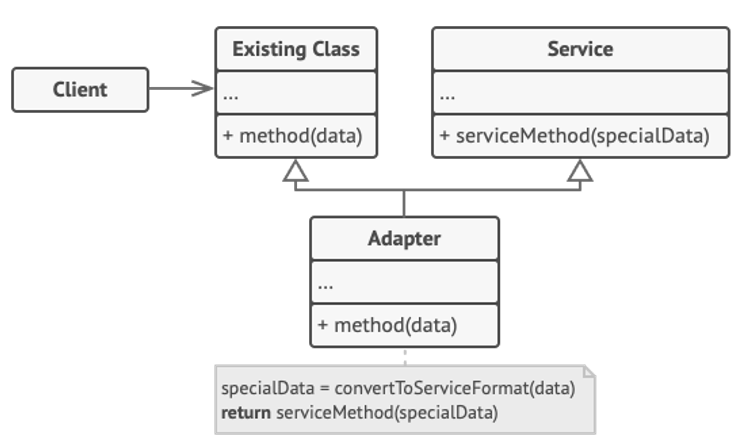

In [20]:
class OldSystem: #existing class -  Adaptee
    def legacy_operation(self, data)-> str:
        return f"Legacy operation {data}"

In [23]:
class Target: #Service
    def request(self, data: str)-> str:# serviceMethod
        return f"I am Target and I can work with {data}"

In [22]:
class Adapter (OldSystem,Target):
    def legacy_operation(self,data:str)-> str:
        specData=data.upper()
        processedData=self.request(specData)
        return super().legacy_operation(processedData)

In [17]:
from typing import Type
def client_code(existingClassObj) -> None:
    print(existingClassObj.legacy_operation("hanna"))

In [24]:
OldSystemObj=OldSystem()
client_code(OldSystemObj)

Legacy operation hanna


In [25]:
hannaAdaper=Adapter()
client_code(hannaAdaper)

Legacy operation I am Target and I can work with HANNA


Example 2: Two languages are supported in the application. you can implement a two-way interface to handle both languages.

In [27]:
class EnglishTranslator: #old system
  
  def coordinator(self):
    return "cordinating the content"

  def translate(self):
    return "Translating in English"

In [29]:
class FrenchConvertor: #service
  def convert(self):
    return "convertir en français"

In [30]:
class Adaptor(EnglishTranslator, FrenchConvertor):
  def translate(self):
    return f"translating: {self.convert()}"

In [33]:
# client code
def get_data(t: EnglishTranslator):
    try:
        print(t.translate())
    except:
        print("incompatible interface!!!")

# execution with English translator
et = EnglishTranslator()
get_data(et) #Translating in english

fc = FrenchConvertor
get_data(fc) #Error: incompatible interface.

ac = Adaptor()
ac.coordinator() #coordinating the content
get_data(ac) #translating: convertir en français 


Translating in English
incompatible interface!!!
translating: convertir en français


#### Object Adapter

Object Adapter takes on the interface of one object while wrapping the behavior of another. You can use this approach in many popular programming languages.

Object Adapter support composition - one object contains another object. It will be always one-way communication from the adapter to the adaptee.

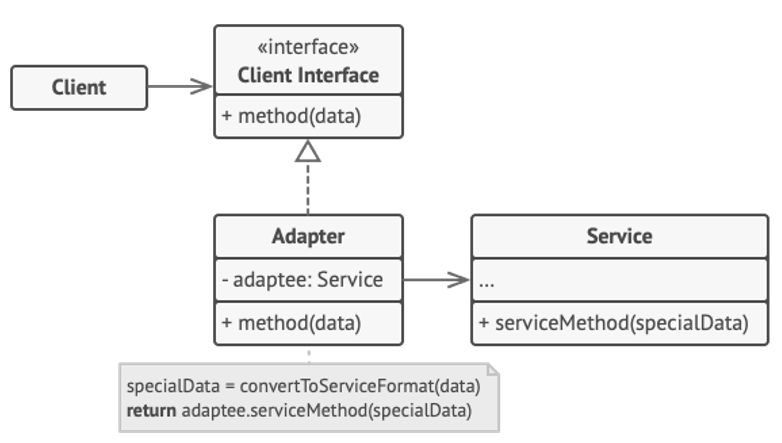

In [2]:
class OldSystem: 
    def legacy_operation(self) -> str: #System
        return "Legacy operation"

In [3]:
from typing import Type

class Adapter:
    def __init__(self, old_system: Type[OldSystem])-> None:
        self.old_system = old_system #adaptee

    def new_operation(self)-> str: #wrapper
        return f"Adapter: {self.old_system.legacy_operation()}"

In [4]:
def client_code(adapter: Type[Adapter])-> None:
    result = adapter.new_operation()
    print(result)

In [5]:
old_system = OldSystem()
adapter = Adapter(old_system)
client_code(adapter)

Adapter: Legacy operation
